# 条件付き確率分布, 尤度, 推定, 記述統計

* 黒木玄
* 2022-05-18
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#条件付き確率分布" data-toc-modified-id="条件付き確率分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>条件付き確率分布</a></span><ul class="toc-item"><li><span><a href="#離散確率分布の条件付き確率分布" data-toc-modified-id="離散確率分布の条件付き確率分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>離散確率分布の条件付き確率分布</a></span></li><li><span><a href="#条件付き期待値の基本性質(離散分布版)" data-toc-modified-id="条件付き期待値の基本性質(離散分布版)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>条件付き期待値の基本性質(離散分布版)</a></span></li><li><span><a href="#離散分布の条件付き確率分布の簡単な例" data-toc-modified-id="離散分布の条件付き確率分布の簡単な例-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>離散分布の条件付き確率分布の簡単な例</a></span></li><li><span><a href="#問題:-離散分布の条件付き確率分布として二項分布が得られること" data-toc-modified-id="問題:-離散分布の条件付き確率分布として二項分布が得られること-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: 離散分布の条件付き確率分布として二項分布が得られること</a></span></li><li><span><a href="#離散分布の場合のBayesの定理" data-toc-modified-id="離散分布の場合のBayesの定理-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>離散分布の場合のBayesの定理</a></span></li><li><span><a href="#2×2の分割表での条件付き確率分布(偽陽性率,-偽陰性率)" data-toc-modified-id="2×2の分割表での条件付き確率分布(偽陽性率,-偽陰性率)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>2×2の分割表での条件付き確率分布(偽陽性率, 偽陰性率)</a></span></li><li><span><a href="#必修の易しい計算問題:-有病率によって偽陽性率と偽陰性率がどのように変化するか" data-toc-modified-id="必修の易しい計算問題:-有病率によって偽陽性率と偽陰性率がどのように変化するか-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>必修の易しい計算問題: 有病率によって偽陽性率と偽陰性率がどのように変化するか</a></span></li><li><span><a href="#有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化" data-toc-modified-id="有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化</a></span></li><li><span><a href="#おまけの問題:-モンティ・ホール問題-(Monty-Hall-problem)" data-toc-modified-id="おまけの問題:-モンティ・ホール問題-(Monty-Hall-problem)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>おまけの問題: モンティ・ホール問題 (Monty Hall problem)</a></span></li><li><span><a href="#連続確率分布の条件付き確率分布" data-toc-modified-id="連続確率分布の条件付き確率分布-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>連続確率分布の条件付き確率分布</a></span></li><li><span><a href="#条件付き期待値の基本性質(連続分布版)" data-toc-modified-id="条件付き期待値の基本性質(連続分布版)-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>条件付き期待値の基本性質(連続分布版)</a></span></li><li><span><a href="#連続分布版のBayesの定理" data-toc-modified-id="連続分布版のBayesの定理-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>連続分布版のBayesの定理</a></span></li><li><span><a href="#2変量の正規分布とその条件付き確率分布の例" data-toc-modified-id="2変量の正規分布とその条件付き確率分布の例-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>2変量の正規分布とその条件付き確率分布の例</a></span></li><li><span><a href="#2変量の正規分布とその条件付き確率分布の例の視覚化" data-toc-modified-id="2変量の正規分布とその条件付き確率分布の例の視覚化-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>2変量の正規分布とその条件付き確率分布の例の視覚化</a></span></li><li><span><a href="#2×2の分割表の分布" data-toc-modified-id="2×2の分割表の分布-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>2×2の分割表の分布</a></span><ul class="toc-item"><li><span><a href="#4つのPoisson分布の積" data-toc-modified-id="4つのPoisson分布の積-1.15.1"><span class="toc-item-num">1.15.1&nbsp;&nbsp;</span>4つのPoisson分布の積</a></span></li><li><span><a href="#四項分布" data-toc-modified-id="四項分布-1.15.2"><span class="toc-item-num">1.15.2&nbsp;&nbsp;</span>四項分布</a></span></li><li><span><a href="#2つの二項分布の積" data-toc-modified-id="2つの二項分布の積-1.15.3"><span class="toc-item-num">1.15.3&nbsp;&nbsp;</span>2つの二項分布の積</a></span></li><li><span><a href="#Fisherの非心超幾何分布" data-toc-modified-id="Fisherの非心超幾何分布-1.15.4"><span class="toc-item-num">1.15.4&nbsp;&nbsp;</span>Fisherの非心超幾何分布</a></span></li><li><span><a href="#四項分布は4つのPoisson分布の積の条件付き確率分布" data-toc-modified-id="四項分布は4つのPoisson分布の積の条件付き確率分布-1.15.5"><span class="toc-item-num">1.15.5&nbsp;&nbsp;</span>四項分布は4つのPoisson分布の積の条件付き確率分布</a></span></li><li><span><a href="#2つの二項分布の積は四項分布は4つの条件付き確率分布" data-toc-modified-id="2つの二項分布の積は四項分布は4つの条件付き確率分布-1.15.6"><span class="toc-item-num">1.15.6&nbsp;&nbsp;</span>2つの二項分布の積は四項分布は4つの条件付き確率分布</a></span></li><li><span><a href="#Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布" data-toc-modified-id="Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布-1.15.7"><span class="toc-item-num">1.15.7&nbsp;&nbsp;</span>Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布</a></span></li><li><span><a href="#独立性条件" data-toc-modified-id="独立性条件-1.15.8"><span class="toc-item-num">1.15.8&nbsp;&nbsp;</span>独立性条件</a></span></li></ul></li></ul></li><li><span><a href="#尤度" data-toc-modified-id="尤度-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>尤度</a></span></li><li><span><a href="#推定" data-toc-modified-id="推定-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>推定</a></span></li><li><span><a href="#記述統計-(要約統計)" data-toc-modified-id="記述統計-(要約統計)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>記述統計 (要約統計)</a></span></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using LinearAlgebra
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 条件付き確率分布

我々は複雑な現実世界に立ち向かうために, 各種の確率分布を数学的モデル(統計モデル)として採用して, モデルとデータを比較することによって, 現実世界の様子を推測しようとする.

そのときに, 統計モデル内部に現実世界で得たデータの数値を持ち込んで利用する方法として,

* 条件付き確率分布を考えること.  統計モデル(数学的フィクション)内部で現実世界から得たデータと同じ数値が生成された場合に制限した条件付き確率分布を考える.
* 尤度を考えること.  統計モデル(数学的フィクション)内部で現実世界から得たデータと同じ数値が生成される確率またはその密度を考える.

の2つが特に基本的である.

以下では前者の条件付き確率分布の概念について一般的に説明する.

### 離散確率分布の条件付き確率分布

離散集合 $\X$ (大文字のグザイ)の中を動く離散変数 $x$ とその確率質量函数 $P(x)$ によって, 離散確率分布 $D$ が与えられているとする. (注意: $x$ は $(x_1,\ldots,x_n)$ のように多変数を1つにまとめて書いたものかもしれない. その場合には $\Xi$ は $\R^n$ の離散部分集合であると考える.)

集合 $\Xi$ 上の函数 $y=f(x)$ が与えられたとき, 確率変数 $Y=f(X)$ が得られる. この $Y$ の函数の期待値は

$$
E[g(Y)] = \sum_{x\in\X} g(f(x)) P(x)
$$

と定義される.  (確率変数とはその函数の期待値が定義されているような変数とみなせるのであった.)

数値 $y$ について, $P(Y=y) > 0$ であると仮定する.

条件 $Y=y$ (もしくは条件 $f(x)=y$)が定める __条件付き確率分布__ (conditional probability distribution) $D|_{Y=y}$ を以下のように定める:

(1) 条件付き確率分布 $D|_{Y=y}$ は離散集合 $\X_y = \{\,x\in\X\mid f(x)=y\,\}$ 上の確率分布である.

(2) 条件付き確率分布 $D|_{Y=y}$ は確率質量函数

$$
P(x|y) = \frac{P(x)}{P(Y=y)}, \quad P(Y=y) = \sum_{f(x)=y}P(x) = \sum_{x\in\X_y}P(x)
$$

によって定義される.  このとき,

$$
\sum_{x\in\X_y} P(x|y) =
\frac{\sum_{x\in\X_y} P(x)}{P(Y=y)} = 1
$$

なので確かにこの確率質量函数は「確率の総和が1になる」という条件を満たしており, 確率分布を定める.

条件 $Y=y$ という条件のもとでの変数 $x$ に対応する確率変数 $X$ と $y$ の函数 $f(X,y)$ の __条件付き期待値__ を次のように書く:

$$
E[f(X,Y)|Y=y] = E[f(X,y)|y] = \sum_x f(x,y) p(x|y).
$$

これと同じ記号法を一般のパラメータ $\theta$ 付きの確率質量函数 $P(x|\theta)$ の場合にも使うことにする:

$$
E[f(X,\theta)|\theta] = \sum_x f(x,\theta) P(x|\theta).
$$

### 条件付き期待値の基本性質(離散分布版)

条件付き期待値 $g(y) = E[f(X,y)|y]$ は $y$ の函数とみなせるので, 確率変数 $E[f(X,Y)|Y] = g(Y)$ が得られる. このとき次が成立することを示せ:

$$
E[g(Y)] = E[E[f(X,Y)|Y]] = E[f(X,Y)].
$$

__解答例:__ 定義通りに計算しよう:

$$
\begin{aligned}
E[f(X,Y)|Y] &= E[g(Y)] = \sum_y g(y)P(y)
\\ &=
\sum_y E[f(X,y)|y] P(y)
\\ &=
\sum_y \left(\sum_x f(x,y)P(x|y)\right)P(y)
\\ &=
\sum_{x,y} f(x,y)P(x|y)P(y)
\\ &=
\sum_{x,y} f(x,y)P(x,y) =
E[f(X,Y)].
\end{aligned}
$$

要するに $x,y$ の同時確率質量函数が $P(x,y)=P(x|y)P(y)$ と書けることから, この問題の結論が出て来る.

__解答終__

__注意:__ 測度論的確率論ではこれを一般化して条件付き期待値を定義する.

### 離散分布の条件付き確率分布の簡単な例

正二十面体のサイコロの20個の面のうち $6$ つの面には1と書いてあり, 5つの面には2と書いてあり, 4つの面には3と書いてあり, 3つの面には4と書いてあり, 残りの2つの面には5と書いてあるとする. そのサイコロをふったときにすべての面は等確率で出るとする. このサイコロの出目の確率分布は

$$
P(1) = \frac{6}{20}, \quad
P(2) = \frac{5}{20}, \quad
P(3) = \frac{4}{20}, \quad
P(4) = \frac{3}{20}, \quad
P(5) = \frac{2}{20}
$$

によって定まる集合 $\X = \{1,2,3,4,5\}$ 上の有限離散分布によってモデル化される.

$\X$ 上の函数 $f(x)$ を $x$ が偶数ならば $f(x)=0$, 奇数ならば $f(x)=1$ と定める.

このとき, 確率変数 $Y=f(X)$ に関する条件付き確率分布を求めてみよう. 

この場合の $\X_y = \{\,x\in\X\mid f(x)=y\,\}$ は次のようになる:

$$
\X_0 = \{2,4\}, \quad
\X_1 = \{1,2,3\}.
$$

さらに,

$$
P(Y=0) = P(2)+P(4) = \frac{8}{20}, \quad
P(Y=1) = P(1)+P(3)+P(5) = \frac{12}{20}
$$

となる.  ゆえに, $P(x|0)$ ($x\in\X_0$) は

$$
\begin{aligned}
&
P(2|0) = \frac{P(2)}{P(Y=0)} = \frac{5/20}{8/20} = \frac{5}{8}, \\ &
P(4|0) = \frac{P(4)}{P(Y=0)} = \frac{3/20}{8/20} = \frac{3}{8}
\end{aligned}
$$

となり, $P(x|1)$ ($x\in\X_1$) は

$$
\begin{aligned}
&
P(1|0) = \frac{P(1)}{P(Y=1)} = \frac{6/20}{12/20} = \frac{6}{12}, \\ &
P(2|0) = \frac{P(3)}{P(Y=1)} = \frac{4/20}{12/20} = \frac{4}{12}, \\ &
P(3|0) = \frac{P(5)}{P(Y=1)} = \frac{2/20}{12/20} = \frac{2}{12}.
\end{aligned}
$$

となる. 偶数の目は2,4の2通りで20面のうち8面に2,4と書かれており, そのうちの5面が2で残りの3面が4なので, 偶数の目に制限した場合に2の目が出る条件付き確率は $P(2|0)=5/8$ になり, 4の目が出る条件付き確率は $P(4|0)=3/8$ になる. 奇数の目の場合も同様である.

### 問題: 離散分布の条件付き確率分布として二項分布が得られること

2つの0以上の整数の組 $(x,y)$ 全体の集合 $\X = \Z_{\ge 0}^2 = \{\,(x,y)\mid x,y=0,1,2,\ldots\,\}$ 上の確率質量函数を次のようにPoisson分布の確率質量函数の積で定める($\lambda,\mu>0$ と仮定する):

$$
P(x,y) = e^{-(\lambda+\mu)}\frac{\lambda^x}{x!}\frac{\mu^y}{y!}
\quad (x,y=0,1,2,\ldots)
$$

集合 $\X$ 上の函数 $f(x,y)$ を $f(x,y)=x+y$ と定める. $N = f(X, Y)$ によって確率変数 $N$ を定めることができる. $N$ の函数の期待値は次のように表される:

$$
E[g(N)] = \sum_{(x,y)\in\X} g(x+y)P(x,y).
$$

以下を示せ:

(1) $N$ は平均 $\lambda+\mu$ のPoisson分布に従う.

(2) $n$ が $0$ 以上の整数であるとき, この場合に条件 $N=n$ が定める条件付き確率分布は本質的に二項分布になる.

__解答例:__ $\X_n = \{\,(x,y)\in\X\mid f(x,y)=x+y=n\,\}$, $P(N=n)$, $P(x,y|n) = P(x,y)/P(N=n)$ ($(x,y\in\X_n$) を順番に計算して行こう. まず, 

$$
\X_n =\{\,(x,n-x)\mid x=0,1,2,\ldots,n\}
$$

であることはすぐにわかる.  次に,

$$
\begin{aligned}
P(N=n) &= \sum_{(x,y)\in\X_n} P(x,y) =
\sum_{x=0}^n e^{-(\lambda+\mu)}\frac{\lambda^x}{x!}\frac{\mu^{n-x}}{(n-x)!}
\\ &=
e^{-(\lambda+\mu)}\frac{1}{n!} \sum_{x=0}^n \frac{n!}{x!(n-x)!} \lambda^x \mu^{n-x} =
e^{-(\lambda+\mu)}\frac{(\lambda+\mu)^n}{n!}.
\end{aligned}
$$

これは確率変数 $N$ が平均 $\lambda+\mu$ のPoisson分布 $\op{Poisson}(\lambda+\mu)$ に従うことを意味し, (1)が示された.  したがって, $(x, n-x)\in\X_n$ のとき,

$$
\begin{aligned}
P(x,n-x|n) &=
\frac{P(x,n-x)}{P(N=n)} =
\frac
{e^{-(\lambda+\mu)}(\lambda^x/x!)(\mu^{n-x}/(n-x)!)}
{e^{-(\lambda+\mu)}(\lambda+\mu)^n/n!}
\\ &=
\frac{n!}{x!(n-x)!}
\left(\frac{\lambda}{\lambda+\mu}\right)^x
\left(\frac{\mu}{\lambda+\mu}\right)^{n-x}
\\ &=
\frac{n!}{x!(n-x)!}
\left(\frac{\lambda}{\lambda+\mu}\right)^x
\left(1 - \frac{\lambda}{\lambda+\mu}\right)^{n-x}.
\end{aligned}
$$

これは条件 $N=n$ が定める条件付き確率分布が本質的に二項分布 $\op{Binomial}(n, \lambda/(\lambda+\mu))$ であることを意味している.  これで(2)も示された.

__解答終__

### 離散分布の場合のBayesの定理

条件付き確率分布の概念を理解していれば, Bayesの定理(ベイズの定理)については忘れてもよい. しかし, Bayesの定理という用語が使われる頻度は高いので念のために説明しておくことにする.

離散集合 $\X=\{(x,y)\}$ 上の離散確率分布が確率質量函数 $P(x,y)$ によって定義されているとする. 以下では $P(X=x)$ や $P(Y=y)$ を以下のように書くことにする:

$$
P(x) = P(X=x) = \sum_y P(x,y),
\quad
P(y) = P(Y=y) = \sum_x P(x,y).
$$

__記号法上の注意:__ 慣習に従って $P(x)$ と $P(y)$ の違いを独立変数名 $x$, $y$ の違いで区別するという記号法を採用している. これは簡潔に書くための手抜きであり, $P_X(x)$ や $P_Y(y)$ のように書けば独立変数名の違いで区別する必要はなくなる.  以下では簡潔さを重視するスタイルを採用したので混乱しないように注意して欲しい. $P(x|y)$ と $P(y|x)$ の違いも独立変数名 $x,y$ の違いで区別することになる.

このとき, $y$ に対応する確率変数 $Y$ によって $Y=y$ という条件で定義される条件付き確率分布の確率質量函数

$$
P(x|y) = \frac{P(x,y)}{P(y)}, \quad
P(y) = \sum_x P(x,y)
\tag{1}
$$

だけではなく, $x$ に対応する確率変数 $X$ によって $X=x$ という条件で定義される条件付き確率分布の確率質量函数

$$
P(y|x) = \frac{P(x,y)}{P(x)}, \quad
P(x) = \sum_y P(x,y)
\tag{2}
$$

が定義される.  このとき

$$
\begin{aligned}
&
P(x,y) = P(x|y)P(y) = P(y|x)P(x),
\\ &
P(x) = \sum_y P(x, y) = \sum_y P(x|y)P(y),
\\ &
P(y) = \sum_x P(x, y) = \sum_x P(y|x)P(x)
\end{aligned}
\tag{3}
$$

なので,

$$
\begin{aligned}
&
P(y|x) = \frac{P(x|y)P(y)}{\sum_y P(x|y)P(y)}, 
\\ &
P(x|y) = \frac{P(y|x)P(x)}{\sum_x P(y|x)P(x)}.
\end{aligned}
\tag{B}
$$

この結果(B)を __Bayesの定理__ (ベイズの定理)と呼ぶ.

しかし, 以上の議論を見ればわかるように, Bayesの定理は条件付き確率分布の定義を書き直したものに過ぎず, 価値ある新しい考え方が得られるような結果ではない.  しかし, 具体的もしくは理論的な計算で条件付き確率の概念が(B)の形式で使われることがあることは知っておいて損がないと思われるので, このように紹介することにした.

__注意:__ 多くの初学者はBayesの定理を「与えられた公式」として直接使う計算を直観的に理解できないことをやってしまっているという理由でよく間違ってしまうようだ. そのようになってしまいそうな人は無理して(B)の公式を直接使おうとせずに, (1),(2)(および(3))まで戻って地道に計算するようにした方がよいだろう.

__注意:__ 以上のようにBayesの定理は条件付き確率の定義から自明に導かれる無理して使う必要がない公式に過ぎない. そのような自明でつまらない結果について, 「逆確率」「主観確率」のような用語を用いて特別な価値があるかのように説明するスタイルが伝統的になってしまっているので惑わされないように注意が必要である.　Bayesの定理は, 条件付き確率の定義を書き直しただけの, 「逆確率」「主観確率」のような用語と無関係に一般的かつ普遍的に成立している自明な数学的定理に過ぎない.

__注意:__ 所謂Bayes統計についても条件付き確率分布の概念まで戻って考えればBayesの定理を使わずに理解可能である.

### 2×2の分割表での条件付き確率分布(偽陽性率, 偽陰性率)

病気Dに罹っているいるかどうかに関するある検査法を使うと,

* 病気Dに罹っている人は $75\%$ の確率で陽性だと判定でき,
* 病気Dに罹っていない人は $95\%$ の確率で陰性と判定できるもの

と仮定する. このとき, この検査法の __感度__ は $75\%$ であり, __特異度__ は $95\%$ であるという. 

この検査を病気Dに罹っている確率が $p$ の人(__有病率__ $p$ の人)に適用する状況について考える. このとき, その人が病気Dに罹っているか否かと検査結果が陽性か陰性かで分類することによって, 次のような $2\times 2$ の確率の表を作れる:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 0.75 p & 0.05(1-p) & 0.05 + 0.70p \\
\hline
\text{陰性} & 0.25 p & 0.95(1-p) & 0.95 - 0.70p \\
\hline
 & p & 1-p & 1 \\
\end{array}
$$

下段の $p, 1-p$ や右端の $0.05+0.70p, 0.95-0.70p$ は確率の縦もしくは横の合計である. それらをよく __マージン__ (margin, 周辺確率)と呼ぶ.

この確率の2×2の表の部分に対応する確率質量函数は以下のように書ける:

$$
\begin{alignedat}{2}
&
P(\text{陽性}, \text{病気有}) = 0.75p, \qquad\qquad
& &
P(\text{陽性}, \text{病気無}) = 0.05(1-p), \qquad\qquad
\\ &
P(\text{陰性}, \text{病気有}) = 0.25p,
& &
P(\text{陰性}, \text{病気無}) = 0.95(1-p).
\end{alignedat}
$$

さらに, マージンとして以下の確率も上の表にすでに書き込まれている:

$$
\begin{aligned}
&
P(\text{病気有}) =
P(\text{陽性}, \text{病気有}) + P(\text{陰性}, \text{病気有}) = p,
\\ &
P(\text{病気無}) =
P(\text{陽性}, \text{病気無}) + P(\text{陰性}, \text{病気無}) = 1-p,
\\ &
P(\text{陽性}) =
P(\text{陽性}, \text{病気有}) + P(\text{陽性}, \text{病気無}) = 0.05 + 0.70p,
\\ &
P(\text{陰性}) =
P(\text{陰性}, \text{病気有}) + P(\text{陰性}, \text{病気無}) = 0.95 - 0.70p.
\end{aligned}
$$

上の表から, 陽性または陰性であるという条件によって定まる病気の有無に関する条件付き確率が以下のように計算される:

$$
\begin{aligned}
&
(\text{陽性的中率}) :=
P(\text{病気有}|\text{陽性}) =
\frac{P(\text{陽性}, \text{病気有})\qquad}{P(\text{陽性})\qquad} =
\frac{0.75p}{0.05 + 0.70p},
\\ &
(\text{偽陽性率}) :=
P(\text{病気有}|\text{陽性}) =
\frac{P(\text{陽性}, \text{病気有})\qquad}{P(\text{陽性})\qquad} =
\frac{0.05(1-p)}{0.05 + 0.70p},
\\ &
(\text{偽陰性率}) :=
P(\text{病気有}|\text{陰性}) =
\frac{P(\text{陰性}, \text{病気有})\qquad}{P(\text{陰性})\qquad} =
\frac{0.25p}{0.95 - 0.70p},
\\ &
(\text{陰性的中率}) :=
P(\text{病気無}|\text{陰性}) =
\frac{P(\text{陰性}, \text{病気無})\qquad}{P(\text{陰性})\qquad} =
\frac{0.95(1-p)}{0.95 - 0.70p}.
\end{aligned}
$$

これらの式は, 私には見難く, 上の確率の表を直接見た方がわかり易いように感じられる. しかし, 議論の内容を正確に把握できるようにするためにあえて式も書いてみた.

__注意:__ 伝統的には以上の内容はBayesの定理の応用として説明されることが多い. しかし, 上の説明ではBayesの定理は一切使用する必要がなかった. このことからもBayesの定理が必須ではないことがわかる. 最後に得られた陽性的中立, 偽陽性率, 偽陰性率, 陰性的中率の公式達はちょうどBayesの定理の形をしている.  そして, すぐ上でも述べたように見易い結果ではない.  実際の計算ではそれらのBayesの定理を使っても得られる公式を使うよりも, 確率の表を地道に書いて, 表を見ながら直接計算した方が間違う可能性も減り, 直観的な意味も理解し易いだろう.

以上を踏まえて次の問題を解け.

### 必修の易しい計算問題: 有病率によって偽陽性率と偽陰性率がどのように変化するか

前節の状況において, 有病率 $p$ が $5\%, 10\%, 20\%, 40\%, 80\%$ の場合の偽陽性率と偽陰性率を求めよ. 

__解答例:__ 前節で求めた偽陽性率と偽陰性率の公式に $p=0.05, 0.1,0.2,0.4,0.8$ を代入すれば求まるが, 以下では地道に確率の表を書いて求めてみよう.  (前節で求めた公式を使った人は以下の地道なやり方を採用しても手間がそう増えず, 状況をより把握し易くなっていることを確認して欲しい.)

前節の確率の表を引用しよう:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 0.75 p & 0.05(1-p) & 0.05 + 0.70p \\
\hline
\text{陰性} & 0.25 p & 0.95(1-p) & 0.95 - 0.70p \\
\hline
 & p & 1-p & 1 \\
\end{array}
$$

$p=0.05$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 3.75\% & 4.75\% & 8.5\% \\
\hline
\text{陰性} & 1.25\% & 90.25\% & 91.5\% \\
\hline
 & 5\% & 95\% & 100\% \\
\end{array}
$$

$p=0.1$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 7.5\% & 4.5\% & 12\% \\
\hline
\text{陰性} & 2.5\% & 85.5\% & 88\% \\
\hline
 & 10\% & 90\% & 100\% \\
\end{array}
$$

$p=0.2$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 15\% & 4\% & 19\% \\
\hline
\text{陰性} & 5\% & 76\% & 81\% \\
\hline
 & 20\% & 80\% & 100\% \\
\end{array}
$$

$p=0.4$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 30\% & 3\% & 33\% \\
\hline
\text{陰性} & 10\% & 57\% & 67\% \\
\hline
 & 40\% & 60\% & 100\% \\
\end{array}
$$

$p=0.8$ の場合:

$$
\begin{array}{c|c|c|c}
& \text{病気有} & \text{病気無} & \\
\hline
\text{陽性} & 60\% & 1\% & 61\% \\
\hline
\text{陰性} & 20\% & 19\% & 39\% \\
\hline
 & 80\% & 20\% & 100\% \\
\end{array}
$$

以上の表を眺めると, 偽陽性率(陽性になった場合の病気無の条件付き確率)と偽陰性率(陰性になった場合の病気有の条件付き確率)は以下の表のようになることがわかる:

$$
\begin{array}{|c|c|c|}
\hline
\text{有病率} & \text{偽陽性率} & \text{偽陰性率} \\
\hline
5\%  & 4.75/8.5 \approx 56\% & 1.25/91.5 \approx 1.4\% \\
10\% & 4.5/12 \approx 38\%   & 2.5/88 \approx 2.8\% \\
20\% & 4/19 \approx 21\%     & 5/81 \approx 6.2\% \\
30\% & 3/33 \approx 9.1\%    & 10/67 \approx 15\% \\
40\% & 1/61 \approx 1.6\%    & 20/39 \approx 51\% \\
\hline
\end{array}
$$

有病率が低いと偽陽性率が高くなり, 有病率が高いと偽陰性率が高くなる.

__解答終__

In [4]:
function falsepositive_falsenegative(prevalence_rate, sensitivity, specificity)
    a = positive_besick  = sensitivity       * prevalence_rate
    b = negative_besick  = (1 - sensitivity) * prevalence_rate
    c = positive_notsick = (1 - specificity) * (1 - prevalence_rate)
    d = negative_notsick = specificity       * (1 - prevalence_rate)
    positive = positive_besick + positive_notsick
    negative = negative_besick + negative_notsick
    falsepositive = positive_notsick / positive
    falsenegative = negative_besick  / negative
    falsepositive, falsenegative
end

falsepositive_falsenegative (generic function with 1 method)

In [5]:
falsepositive_falsenegative.([0.05, 0.1, 0.2, 0.4, 0.8], 0.75, 0.95) .|>
x -> round.(x; digits=4)

5-element Vector{Tuple{Float64, Float64}}:
 (0.5588, 0.0137)
 (0.375, 0.0284)
 (0.2105, 0.0617)
 (0.0909, 0.1493)
 (0.0164, 0.5128)

### 有病率によって偽陽性率と偽陰性率がどのように変化するかの視覚化

In [6]:
function plot_falsepositive(prevalence_rate, sensitivity, specificity;
        xsize = 20, ysize = xsize, ms = 5, size = (480, 300), kwargs...)
    N = xsize * ysize
    a = positive_besick  = sensitivity       * prevalence_rate
    b = negative_besick  = (1 - sensitivity) * prevalence_rate
    c = positive_notsick = (1 - specificity) * (1 - prevalence_rate)
    d = negative_notsick = specificity       * (1 - prevalence_rate)
    A = round(Int, a*N)
    B = round(Int, b*N)
    C = round(Int, c*N)
    D = round(Int, d*N)
    xsize_besick  = (A + B + ysize - 1) ÷ ysize 
    xsize_notsick = (C + D + ysize - 1) ÷ ysize 
    TP = [(mod(i, xsize_besick), -(i ÷ xsize_besick)) for i in 0:A-1]
    FN = [(mod(i, xsize_besick), -(i ÷ xsize_besick)) for i in A:A+B-1]
    FP = [(xsize_besick + mod(i, xsize_notsick), -(i ÷ xsize_notsick)) for i in 0:C-1]
    TN = [(xsize_besick + mod(i, xsize_notsick), -(i ÷ xsize_notsick)) for i in C:C+D-1]
    P = plot(; frame=false, axis=false, tick=false, margin=0Plots.mm)
    scatter!(TP; m=:utriangle, msc=:red, mc=:white, label="true-positive", ms)
    scatter!(FN; m=:diamond, msc=:red, mc=:white, label="false-negative", ms, msw=3)
    scatter!(FP; m=:dtriangle, msc=:blue, mc=:white, label="false-positive", ms, msw=3)
    scatter!(TN; m=:square, msc=:blue, mc=:white, label="true-negative", ms)
    plot!(; legend = :outertopright)
    plot!(; xlim = (-0.5, xsize+0.5), ylim = (-ysize-0.5, 0.5))
    plot!(; size, kwargs...)
 end

plot_falsepositive (generic function with 1 method)

赤色は病気有を, 青色は病気無を意味する.  すなわち, 赤い上向き三角と赤いひし形は病気Dに罹っている人で, 青の下向き三角と青の正方形は病気に罹っていない人である. 

三角は検査陽性を意味し, 四角は検査陰性を意味する. すなわち, 赤い上向き三角と青の下向き三角は検査で陽性になった人達で, それ以外のひし形と正方形は陰性になった人達である.

青い下向き三角は病気Dに罹っていないのに検査で陽性になってしまったので偽陽性. 目立つように太くしてある.

赤いひし形は病気Dに罹っているのに検査で陰性になってしまったので偽陰性. これも目立つように太くしてある.

以下の図を見れば, 有病率(赤色の割合=赤い上向き三角と赤いひし形を合わせた割合)を変えたときにどのように偽陽性と偽陰性の割合が変化するかが分かる.

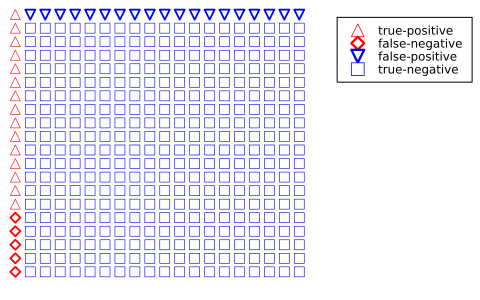

In [7]:
plot_falsepositive(0.05, 0.75, 0.95)

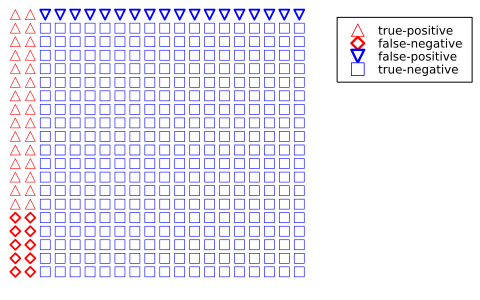

In [8]:
plot_falsepositive(0.10, 0.75, 0.95)

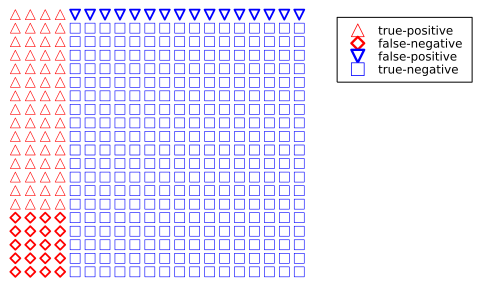

In [9]:
plot_falsepositive(0.20, 0.75, 0.95)

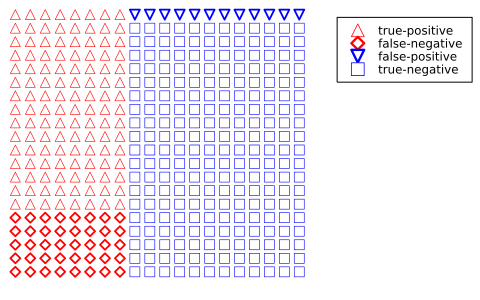

In [10]:
plot_falsepositive(0.40, 0.75, 0.95)

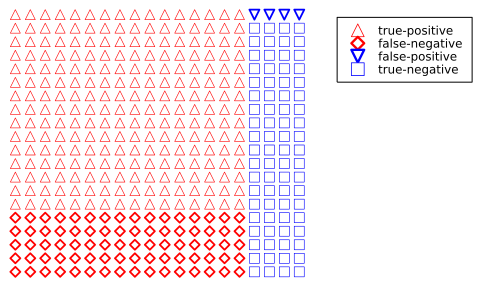

In [11]:
plot_falsepositive(0.80, 0.75, 0.95)

### おまけの問題: モンティ・ホール問題 (Monty Hall problem)

以下のようなゲームを考える:

(1) 親は $1,2,3$ の中から番号 $X$ を無作為に選んで秘密にしておく.

(2) あなたは, $1,2,3$ の中から番号 $1$ を選んでそれを親に告げる.

(3) 親は $1,2,3$ の中から $1$ と $X$ 以外の番号 $Y$ を無作為に選んで, あなたに告げる.

(4) あなたは $1,2,3$ の中から $1$, $Y$ を除いて残った1つの番号 $Z$ を選ぶ.

あなたが最後に選んだ番号 $Z$ が秘密の番号 $X$ に一致する確率を求めよ.

__代表的誤答例:__ $Z=X$ となる確率は $1/2$ である. __誤答終__

__解答例1:__ すべての場合の確率を書き下す方法. 確率 $P(X=x, Y=y)$ 達を表にすると以下のようになる:

$$
\begin{array}{c|ccc|c}
      & Y = 1 & Y = 2 & Y = 3 & \\
\hline
X = 1 & 0     & 1/6   & 1/6   & 1/3 \\
X = 2 & 0     & 0     & 1/3   & 1/3 \\
X = 3 & 0     & 1/3   & 0     & 1/3 \\
\hline
      & 0     & 1/2   & 1/2 & \\
\end{array}
$$

$Y$ として $1$ と $X$ 以外の番号を選ぶので, $Y=1$ の確率は $0$ になる.  $X=1$ となる確率は $1/3$ であり, そのとき, $1$ と $X=1$ 以外の番号は $2,3$ の2つで, それらを無作為に選ぶのでそれぞれに確率は $1/6$ になる.  $X=2$ の場合には常に $Y=3$ となり, $X=3$ の場合には常に $Y=2$ となり, それぞれの確率は $1/3$ になる. これを表にすると上のようになる.

* $X=1$, $Y=2$ のとき $Z=3$ となり, $Z\ne X$ となる.
* $X=1$, $Y=3$ のとき $Z=2$ となり, $Z\ne X$ となる.
* $X=2$, $Y=3$ のとき $Z=2$ となり, $Z = X$ となる.
* $X=3$, $Y=2$ のとき $Z=3$ となり, $Z = X$ となる.

ゆえに $P(Z=X) = P(X=2, Y=3) + P(X=3, Y=2) = 1/3 + 1/3 = 2/3$.

__解答終__

__解答例2:__ あなたが最後に選んだ番号 $Z$ が $X$ に一致しないことと, あなたが最初に選んだ番号 $1$ が $X$ に一致することは同値であり, $X=1$ となる確率は $1/3$ である.  ゆえに, その補事象である $Z=X$ となる確率は $2/3$ である. 

__解答終__

__注意:__ 単に確率を計算すればよいだけの問題である. 「主観確率」「ベイズ確率」のような用語を持ち出す説明を読むときには, 本当は易しい話を無駄に難しく考えて, おかしな考え方に陥っていることを疑った方がよい.  歴史の偶然のせいで世間的に広まってしまった考え方の多くが間違っている.

### 連続確率分布の条件付き確率分布

連続変数 $(x, y)$ の確率密度函数 $p(x,y)$ が定める連続分布 $D$ を考え, 変数 $y$ に対応する確率変数を $Y$ と書く:

$$
E[f(Y)] = \iint f(y)p(x,y)\,dx\,dy =
\int f(y)\left(\int p(x,y)\,dx\right) dy.
$$

これより, 確率変数 $Y$ が従う分布は確率密度函数

$$
p(y) = \int p(x,y)\,dx
$$

を持つことがわかる. 条件 $Y=y$ が定める $x$ に関する __条件付き確率分布__ の密度函数 $p(x|y)$ を次のように定める:

$$
p(x|y) = \frac{p(x,y)}{p(y)}.
$$

このとき,

$$
\int p(x|y)\,dx = \frac{\int p(x,y)\,dx}{p(y)} = 1
$$

より, $p(x|y)$ がパラメータ $y$ を持つ $x$ の確率密度函数になっていることがわかる.

条件 $Y=y$ という条件のもとでの変数 $x$ に対応する確率変数 $X$ と $y$ 付きの函数 $f(X,y)$ の __条件付き期待値__ を次のように定める:

$$
E[f(X,Y)|Y=y] = E[f(X,y)|y] = \int f(x,y) p(x|y)\,dx.
$$

これと同じ記号法を一般のパラメータ $\theta$ 付きの確率密度函数 $p(x|\theta)$ の場合にも使うことにする:

$$
E[f(X,\theta)|\theta] = \int f(x,\theta) p(x|\theta)\,dx.
$$

__注意:__ 条件付き確率分布の密度函数の定義について.

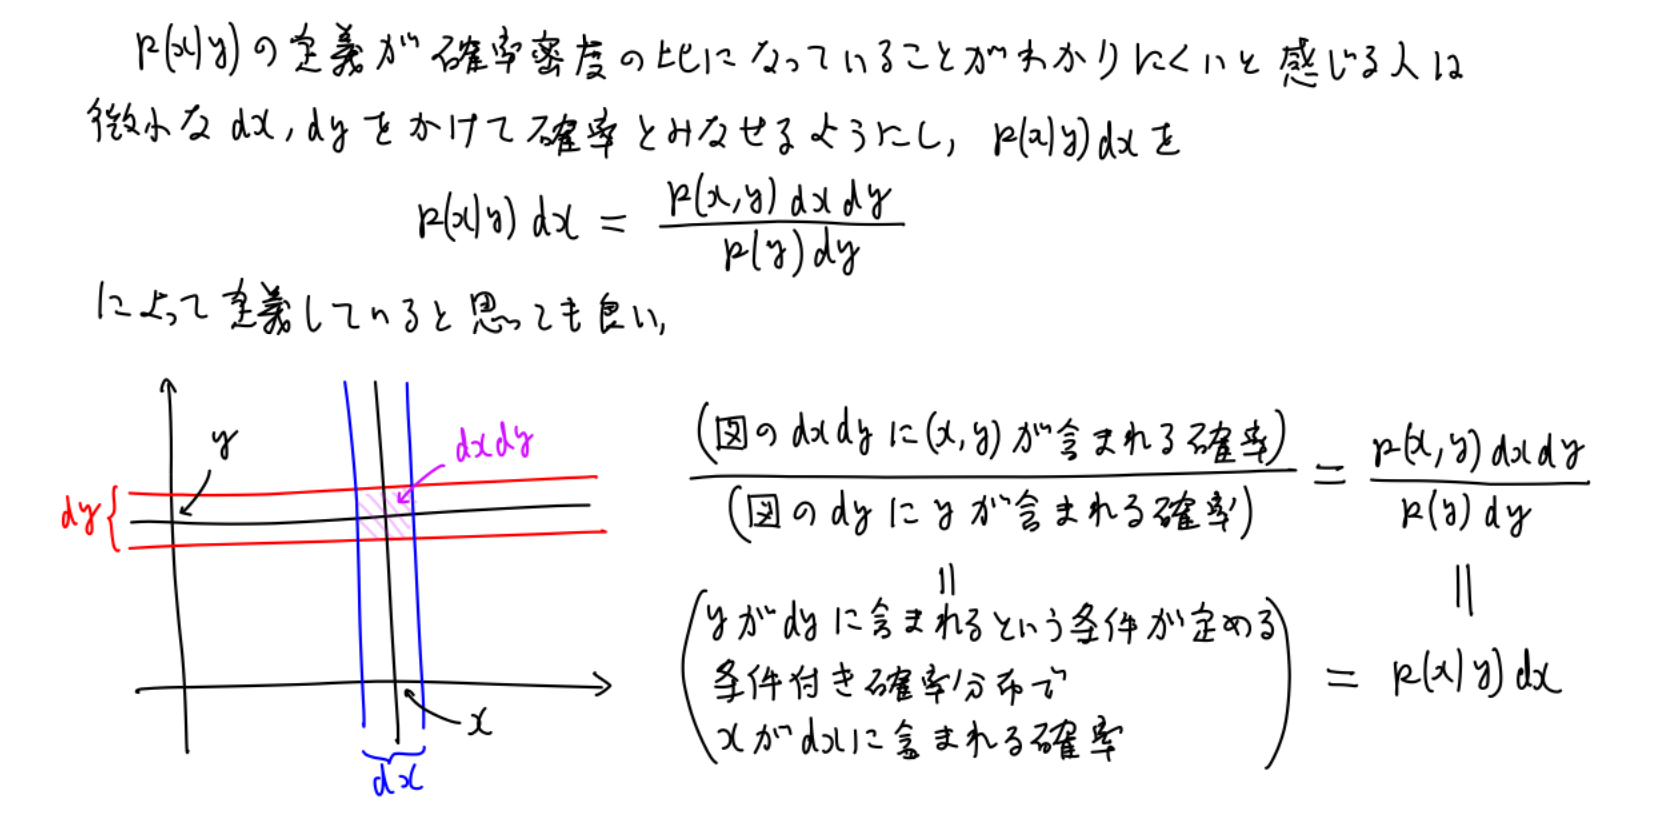

### 条件付き期待値の基本性質(連続分布版)

条件付き期待値 $g(y) = E[f(X,y)|y]$ は $y$ の函数とみなせるので, 確率変数 $E[f(X,Y)|Y] = g(Y)$ が得られる. このとき次が成立することを示せ:

$$
E[g(Y)] = E[E[f(X,Y)|Y]] = E[f(X,Y)].
$$

__解答例:__ 定義通りに計算しよう:

$$
\begin{aligned}
E[f(X,Y)|Y] &= E[g(Y)] = \int g(y)p(y)\,dy
\\ &=
\int E[f(X,y)|y] p(y)\,dy
\\ &=
\int \left(\int f(x,y)p(x|y)\,dx\right)p(y)\,dy
\\ &=
\iint f(x,y)p(x|y)p(y)\,dx\,dy
\\ &=
\iint f(x,y)p(x,y)\,dx\,dy =
E[f(X,Y)].
\end{aligned}
$$

要するに $x,y$ の同時確率密度函数が $p(x,y)=p(x|y)p(y)$ と書けることから, この問題の結論が出て来る.

__解答終__

__注意:__ 測度論的確率論ではこれを一般化して条件付き期待値を定義する.

### 連続分布版のBayesの定理

連続変数 $(x,y)$ の確率密度函数 $P(x,y)$ によって連続確率分布が定義されているとする. 以下では, 変数 $x,y$ に対応する確率変数達 $X,Y$ それぞれ単独の確率密度函数を $p(x),p(y)$ と書くことにする:

$$
p(x) = \int p(x,y)\,dy
\quad
p(y) = \int p(x,y)\,dx.
$$

確率密度函数 $p(x), $p(y)$ のそれぞれが定める $x,y$ の分布を __周辺分布__ (marginal distribution)と呼ぶことがある.

このとき, $y$ に対応する確率変数 $Y$ によって $Y=y$ という条件で定義される条件付き確率分布の確率密度函数

$$
p(x|y) = \frac{p(x,y)}{p(y)}, \quad
p(y) = \int p(x,y)\,dx
\tag{1}
$$

だけではなく, $x$ に対応する確率変数 $X$ によって $X=x$ という条件で定義される条件付き確率分布の確率密度函数

$$
p(y|x) = \frac{p(x,y)}{p(x)}, \quad
p(x) = \int P(x,y)\,dy
\tag{2}
$$

が定義される.  このとき

$$
\begin{aligned}
&
p(x,y) = p(x|y)p(y) = p(y|x)p(x),
\\ &
p(x) = \int p(x,y)\,dy = \int p(x|y)p(y)\,dy,
\\ &
p(y) = \int p(x,y)\,dx = \int p(y|x)p(x)\,dx
\end{aligned}
\tag{3}
$$

なので,

$$
\begin{aligned}
&
p(y|x) = \frac{p(x|y)p(y)}{\int p(x|y)p(y)\,dy}, 
\\ &
p(x|y) = \frac{p(y|x)p(x)}{\int p(y|x)p(x)\,dx}.
\end{aligned}
\tag{B}
$$

この結果(B)を __Bayesの定理__ (ベイズの定理)と呼ぶ.

しかし, 以上の議論を見ればわかるように, Bayesの定理は条件付き確率分布の定義を書き直したものに過ぎず, 価値ある新しい考え方が得られるような結果ではない.  しかし, 具体的もしくは理論的な計算で条件付き確率の概念が(B)の形式で使われることがあることは知っておいて損がないと思われるので, このように紹介することにした.

__記号法上の注意:__ 慣習に従って $p(x)$ と $p(y)$ の違いを独立変数名 $x$, $y$ の違いで区別するという記号法を採用した. これは簡潔に書くための手抜きであり, $p_X(x)$ や $p_Y(y)$ のように書けば独立変数名の違いで区別する必要はなくなる.  以上では簡潔さを重視するスタイルを採用したので混乱しないように注意して欲しい. $p(x|y)$ と $p(y|x)$ の違いも独立変数名 $x,y$ の違いで区別することになった.

__注意:__ Bayes統計ではパラメータ $\theta$ 付きの確率密度函数 $p(x|\theta)$ の他にパラメータ $\theta$ の確率密度函数 $p(\theta)$ も用意して, $x$ と $\theta$ の同時確率密度函数を $p(x,\theta)=p(x|\theta)p(\theta)$ と定義する.  この状況のもとでは, $X=x$ という条件で定義される $\theta$ の条件付き確率分布 $p(\theta|x)$ は次のように表される:

$$
p(\theta|x) = \frac{p(x|\theta)p(\theta)}{\int p(x|\theta)p(\theta)\,d\theta}.
$$

Bayes統計の文脈では, $p(\theta)$ は __事前分布__ (prior)と呼ばれ, $p(x|\theta)$ は __事後分布__ (posterior)と呼ばれる.  Bayes統計では新たな道具として事前分布 $p(\theta)$ を利用できるお陰で, それ抜きでは困難な統計分析も可能になる.  ただし, Bayes統計がそういう優れた性質を持っている理由は「主観確率」や「ベイズ主義」のような概念抜きに語ることができる. この点に関する詳しい説明は次の教科書にある:

* 渡辺澄夫, ベイズ統計の理論と方法, 2012年, コロナ社, 226ページ.

さらに, 次の論説も参考になる:

* 赤池弘次, 統計的推論のパラダイムの変遷について, 統計数理研究所彙報, 1980年第27巻第1号, pp. 5-12.  [link](https://ismrepo.ism.ac.jp/index.php?active_action=repository_view_main_item_detail&page_id=13&block_id=21&item_id=32568&item_no=1)

### 2変量の正規分布とその条件付き確率分布の例

$$
\Sigma =
\begin{bmatrix}
a & b \\
b & d \\
\end{bmatrix}
$$

は固有値がすべて正の実対称行列であるとし, $\mu=(\mu_x, \mu_y) \in \R^2$ であるとする. このとき, 

$$
\Sigma^{-1} = 
\frac{1}{ac-b^2}
\begin{bmatrix}
c & -b \\
-b & a \\
\end{bmatrix}
$$

であり, $(x,y)\in\R^2$ の確率密度函数を

$$
\begin{aligned}
p(x,y) &=
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}
\big[x - \mu_x,\; y - \mu_y \big]
\Sigma^{-1}
\begin{bmatrix}
x - \mu_x \\
y - \mu_y \\
\end{bmatrix}
\right)
\\ &=
\frac{1}{\sqrt{(2\pi)^2(ac-b^2)}}
\exp\left(-\frac
{a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2}
{2(ac-b^2)}
\right)
\end{aligned}
$$

と定めることができる. これが $\iint_{\R^2} p(x,y)\,dx\,dy = 1$ を満たすことは, $\Sigma$ を直交行列で対角すれば示せる(詳細は略す). この確率密度函数が定める確率分布を2変量正規分布と呼び,

$$
\op{MvNormal}(\mu, \Sigma)
$$

と表すことにする. (この記号法は2変量に限らない, 任意の __多変量正規分布__ (multivariate normal distribution)にも使用することにする.)

2変量正規分布において条件 $X=x$ が定める $y$ に関する条件付き確率分布を求めよう.

$$
\begin{aligned}
&
a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2 - \frac{b^2}{a}(x - \mu_x)^2 + c(x - \mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2 + \frac{ac-b^2}{a}(x - \mu_x)^2.
\end{aligned}
$$

ゆえに,

$$
\begin{aligned}
&
\sqrt{(2\pi)^2(ac-b^2)}\;p(x)
\\ &=
\int_\R \exp\left(-\frac
{a\left(y - \mu_y - (b/a)(x - \mu_x)\right)^2 + ((ac-b^2)/a)(x - \mu_x)^2}
{2(ac-b^2)}
\right)dy
\\ &=
\sqrt{\frac{2\pi(ac-b^2)}{a}}
\exp\left(-\frac{(x - \mu_x)^2}{2a}\right)
\end{aligned}
$$

なので,

$$
p(x) = \frac{1}{\sqrt{2\pi a}}
\exp\left(-\frac{(x - \mu_x)^2}{2a}\right).
$$

これは $x$ の周辺分布が平均 $\mu_x$, 分散 $a$ の正規分布になることを意味している. (実は多変量正規分布の一般論からこれは言えることでもある.) さらに, 

$$
\begin{aligned}
&
a(y-\mu_y)^2 - 2b(x-\mu_x)(y-\mu_y) + c(x-\mu_x)^2 - \frac{ac-b^2}{a}(x - \mu_x)^2
\\ &=
a\left(y - \mu_y - \frac{b}{a}(x - \mu_x)\right)^2
\end{aligned}
$$

より,

$$
\begin{aligned}
p(y|x) &=
\frac{p(x,y)}{p(x)} =
\frac{1}{\sqrt{2\pi(ac-b^2)/a}}
\exp\left(-\frac
{a\left(y - \mu_y - (b/a)(x - \mu_x)\right)^2}
{2(ac-b^2)}
\right).
\end{aligned}
$$

これは条件 $X=x$ が定める $y$ の条件付き確率分布が平均 $(b/a)(x-\mu_x) + \mu_y$, 分散が $(ac-b^2)/a$ の正規分布になることを意味している. 

__注意:__ 以上の計算を一般の多変量正規分布に一般化すれば __Gauss過程回帰__ が得られる.

__注意:__ 最小二乗法による線形回帰との関係.  条件付き確率分布の平均と分散は $\sigma_x^2 = a$, $\sigma_{xy} = b$, $\sigma_y^2 = c$ と書くと,

$$
\frac{b}{a}(x-\mu_x) + \mu_y = \frac{\sigma_{xy}}{\sigma_x^2}(x - \mu_x) + \mu_y, \quad
\frac{ac-b^2}{a} = \frac{\sigma_x^2\sigma_y^2 - \sigma_{xy}^2}{\sigma_x^2}
$$

と表される.  これは「標本分布について」のノートで導出したデータ $(x_1,y_1),\ldots,(x_n,y_n)$ に関する最小二乗法による線形回帰の公式

$$
\hat\alpha + \hat\beta x = \frac{s_{xy}}{s_x^2}(x - \bar{x}) + \bar{y}, \quad
\hat\sigma^2 = \frac{n-1}{n}\frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2}
$$

に非常に似ている. ここで

$$
\begin{aligned}
&
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i,
\\ &
s_x^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2, \quad
s_y^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2,
\\ &
s_{xy} = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

さらに, 

$$
\begin{aligned}
&
\hat\mu_x = \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\hat\mu_y = \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i,
\\ &
\hat\sigma_x^2 = \frac{n-1}{n}s_x^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2, \quad
\hat\sigma_y^2 = \frac{n-1}{n}s_y^2 = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2,
\\ &
\hat\sigma_{xy} = \frac{n-1}{n}s_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).
\end{aligned}
$$

とおくと,

$$
\hat\alpha + \hat\beta x = \frac{\hat\sigma_{xy}}{\hat\sigma_x^2}(x - \hat\mu_x) + \hat\mu_y, \quad
\hat\sigma^2 = \frac{\hat\sigma_x^2 \hat\sigma_y^2 - \hat\sigma_{xy}^2}{\hat\sigma_x^2}
$$

となり, 式の類似性はさらに増す.

この類似は偶然ではない. 最小二乗法による線形回帰は, データ $(x_1,y_1),\ldots,(x_n,y_n)$ に最もフィットする2変量正規分布を最尤法で構成し($\hat\mu_x$, $\hat\mu_y$, $\hat\sigma_x^2$, $\hat\sigma_y^2$, $\hat\sigma_{xy}$ がその最尤法の解になっている), 条件 $X=x$ で定められた $y$ に関する条件付き確率分布を求めることと数学的に同じことになっている.

### 2変量の正規分布とその条件付き確率分布の例の視覚化

以下では前節の内容を2変量正規分布の乱数を大量に生成することによって数値的に確認してみよう.

In [12]:
# 二変量正規分布
μ = [10, 20]
Σ = [
    6 2
    2 3
]
mvnormal = MvNormal(μ, Σ)

FullNormal(
dim: 2
μ: [10.0, 20.0]
Σ: [6.0 2.0; 2.0 3.0]
)


In [13]:
# X, Y 単独の分布
xdist = Normal(μ[1], √Σ[1,1])
ydist = Normal(μ[2], √Σ[2,2])
@show xdist ydist;

xdist = Normal{Float64}(μ=10.0, σ=2.449489742783178)
ydist = Normal{Float64}(μ=20.0, σ=1.7320508075688772)


In [14]:
# 条件X=xが定めるyの条件付き確率分布の平均値 (≈ 回帰直線 (regression line))
f(x, μ, Σ) = (Σ[1,2]/Σ[1,1])*(x - μ[1]) + μ[2]

f (generic function with 1 method)

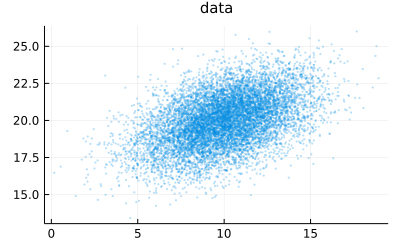

In [15]:
# テストデータの生成: 二変量正規分布の分布は楕円状になる.
n = 10^4
XY = rand(mvnormal, n)
X, Y = XY[1,:], XY[2,:]
scatter(X, Y; ma=0.3, ms=2, msw=0, label="", title="data")

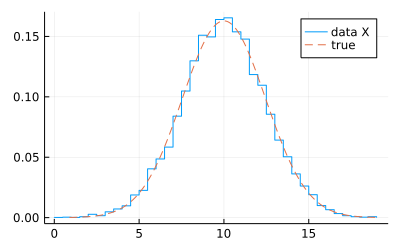

In [16]:
# データでのX単独の分布
stephist(X; norm=true, label="data X")
plot!(xdist; label="true", ls=:dash)

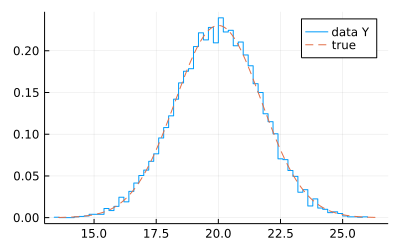

In [17]:
# データでのY単独の分布
stephist(Y; norm=true, label="data Y")
plot!(ydist; label="true", ls=:dash)

In [18]:
# μの最尤推定
μ̂ = mean(XY, dims=2)

2×1 Matrix{Float64}:
  9.996104060115607
 19.996019122205922

In [19]:
# Σの最尤推定
Σ̂ = cov(XY'; corrected=false)

2×2 Matrix{Float64}:
 6.05244  1.95382
 1.95382  2.95701

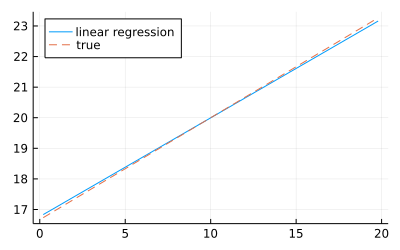

In [20]:
# 条件X=xが定めるyの条件付き確率分布の期待値と回帰直線の比較
xlim = (μ[1] - 4√Σ[1,1], μ[1] + 4√Σ[1,1])
plot(x -> f(x, μ̂, Σ̂), xlim...; label="linear regression")
plot!(x -> f(x, μ, Σ), xlim...; label="true", ls=:dash)
plot!(; legend=:topleft)

In [21]:
# 条件X=xが定めるyの条件付き確率分布の分散とその推定値の比較
σ² = det(Σ)/Σ[1,1]
σ̂² = det(Σ̂)/Σ̂[1,1]
@show σ² σ̂²;

σ² = 2.3333333333333335
σ̂² = 2.326291579285786


### 2×2の分割表の分布

実践的によく使われている2×2の分割表のモデルになる確率分布を紹介しよう.

2×2の分割表とは数学的には0以上の整数を成分とする2×2の行列

$$
A =
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix} =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix},
\quad a_{ij} \in \Z_{\ge 0}
$$

のことである.  以下では2×2の分割表の集合に順次制限して狭くして行きながら, 4種類の確率分布を紹介する.

#### 4つのPoisson分布の積

$\lambda_{ij} \ge 0$ であるとし, 

$$
\lambda =
\begin{bmatrix}
\lambda_{11} & \lambda_{12} \\
\lambda_{21} & \lambda_{22} \\
\end{bmatrix}
$$

とおく.  制限のない分割表 $A=[a_{ij}]$ 達の確率質量函数

$$
P(A|\lambda) =
\prod_{i,j=1}^2\left(e^{-\lambda_{ij}}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}\right)
\qquad (a_{ij}\in\Z_{\ge 0})
$$

で定まる分割表の確率分布を __4つのPoisson分布の積__ と呼ぶことにする.

分割表の4つのPoisson分布の積モデルはある一定期間のあいだ収集したサンプルを2つの条件 $X,Y$ を使って次のように分類することによって得られた2×2の分割表のモデルになっていると考えられる:

* $a_{11}$ はサンプル中の $X$ でかつ $Y$ であるものの個数で, $a_{12}$ は $X$ でかつ $Y$ でないものの個数で,  $a_{21}$ は $X$ でなくて $Y$ であるものの個数で, $a_{22}$ は $X$ でも $Y$ でもないものの個数であるとする.

以上の設定のもとで4つのPoisson分布の期待値は

$$
\lambda =
\begin{bmatrix}
\lambda_{11} & \lambda_{12} \\
\lambda_{21} & \lambda_{22} \\
\end{bmatrix}
$$

に一致する.

#### 四項分布

$\theta_{ij}\ge 0$, $\sum_{i,j=1}^2 \theta_{ij} = 1$ であるとし, 

$$
\theta =
\begin{bmatrix}
\theta_{11} & \theta_{12} \\
\theta_{21} & \theta_{22} \\
\end{bmatrix}
$$

とおく.  $n\in\Z_{\ge 0}$ を任意に取って固定し, 成分の総和が $n$ になるという条件

$$
\sum_{i,j=1}^2 a_{ij} = n
$$

を満たす分割表 $A=[a_{ij}]$ に関する確率分布が次の確率質量函数によって定められる:

$$
P(A|n,\theta) = n!\prod_{i,j=1}^4 \frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}
\qquad
(a_{11}+a_{12}+a_{21}+a_{22} = n)
$$

これは __四項分布__ である.

分割表の四項分布モデルは, 最初に決めておいたサイズ $n$ のサンプルを収集して, 2つの条件 $X,Y$ を使って前節を同じようにサンプルを分類することによって得られた分割表のモデル化になっていると考えられる.

この四項分布の期待値は

$$
n\theta =
\begin{bmatrix}
n\theta_{11} & n\theta_{12} \\
n\theta_{21} & n\theta_{22} \\
\end{bmatrix}
$$

になる.

#### 2つの二項分布の積

$0\le\eta_i\le 1$ ($i=1,2$)であるとし, $\eta = (\eta_1, \eta_2)$ とおく. $r_1, r_2 \in\Z_{\ge 0}$ を任意に取って固定し, $r=(r_1,r_2)$ とおく. このとき, 横方向の合計(横方向のマージン)が

$$
\sum_{j=1}^n a_{ij} = r_i \quad (i=1,2)
$$

と固定されているような分割表の確率分布を次の確率質量函数によって定めることができる:

$$
P(A|r,\eta) =
\binom{r_1}{a_{11}} \eta_1^{a_{11}}(1 - \eta_2)^{a_{12}} \cdot
\binom{r_2}{a_{21}} \eta_1^{a_{21}}(1 - \eta_2)^{a_{22}}
\quad (a_{i1}+a_{i2}=r_i)
$$

これを __2つの二項分布の積__ と呼ぶ.

分割表の2つの二項分布の積モデルは, 前もって決めておいたサイズ $r_1, r_2$ の条件 $X$ を満たす群と満たさない群のサンプルを取得して, 条件 $Y$ によって分類することによって得られた分割表のモデル化になっていると考えられる.

この設定のもとで, 2つの二項分布の積の期待値は

$$
\begin{aligned}
r_1\eta_1 & r_1(1-\eta_1) \\
r_2\eta_2 & r_2(1-\eta_2) \\
\end{aligned}
$$

になる.

#### Fisherの非心超幾何分布

$\omega > 0$ であるとする. $r_1,r_2,s_1,s_2,n\in\Z_{\ge 0}$ で

$$
n = r_1+r_2 = s_1+s_2
$$

という条件を満たすものを任意に取って固定し, $r=(r_1,r_2)$, $s=(s_1,s_2)$ とおく. このとき, 横方向の合計と縦方向の合計の両方(全マージン)が

$$
\sum_{j=1}^2 a_{ij} = r_i \quad(i=1,2), \qquad
\sum_{i=1}^2 a_{ij} = s_j \quad(j=1,2)
$$

と固定されているような分割表の確率分布を次の形の確率質量函数によって定めることができる:

$$
\begin{aligned}
&
P(A|r,s,\omega)
\\ &=
Z(r,s,\omega)^{-1}\frac{\omega^{a_{11}}}{\prod_{i,j=1}^2 a_{ij}!} =
\frac{\omega^{a_{11}}}{\widetilde{Z}(r,s,\omega)}
\binom{n}{r_1}^{-1}\binom{s_1}{a_{11}}\binom{s_2}{a_{12}}
\\ &=
\frac{\omega^{a_{11}}}{\widetilde{Z}(r,s,\omega)}
\binom{r_1}{a_{11}}
\frac{s_1(s_1-1)\cdots(s_1-a_{11}+1)\,s_2(s_2-1)\cdots(s_2-(r_1-a_{11})+1)}
{n(n-1)\cdots(n-r_1+1)}.
\\ &
(a_{i1}+a_{i2}=r_i,\; a_{1j}+a_{2j}=s_j)
\end{aligned}
$$

これを __Fisherの非心超幾何分布__ (Fisher's noncentral hypergeometric distribution)と呼ぶ.

パラメータの函数達 $Z(r,s,\omega)$, $\widetilde{Z}(r,s,\omega)$ は確率の総和が $1$ になるという条件で決める.  一般にそれらの定数の具体形はシンプルに書けないが, $\omega = 1$ の場合は例外的に, $n=r_1+r_2=s_1+s_2$ とおくと,

$$
\widetilde{Z}(r,s,1) = 1, \quad
Z(r,s,1) = \frac{n!}{r_1!r_2!s_1!s_2!}
$$

とシンプルな形になり, 

$$
P(A|r,s,1) =
\binom{n}{r_1}^{-1} \binom{s_1}{a_{11}}\binom{s_2}{a_{12}} =
\frac{r_1!r_2!s_1!s_2!}{n!a_{11}!a_{12}!a_{21}!a_{22}!}
$$

となる.  この $\omega=1$ の場合のFisherの非心超幾何分布は単に __超幾何分布__ と呼ばれている. 

この超幾何分布の期待値は

$$
\begin{bmatrix}
r_1s_1/n & r_1s_2/n \\
r_2s_1/n & r_2s_2/n \\
\end{bmatrix}
$$

になる.

__注意:__ 超幾何分布の確率質量函数の上の表示は以下のような解釈を持つ. 

袋の中に $s_1$ 個の赤い玉と $s_2$ 個の白い玉が入っているとし, その中から $r_1$ 個の玉を一度にまとめて無作為に取り出す.  取り出した $r_1$ 個の玉の中の赤い玉の個数を $a_{11}$ とし, 白い玉の個数を $a_{12} = r_1 - a_{11}$ と書き, 袋の中に残された $r_2$ 個の玉の中の赤い玉の個数を $a_{21}=s_1-a{11}$ と書き, 白い玉の個数を $a_{22}=s_2-a_{12} = s_2 - r_1 + a_{11}$ と書き, 2×2の分割表 $A=[a_{ij}]$ を作る.  $a_{11}$ だけから残りの $a_{12},a_{21}.a_{22}$ の値が決定される.

このとき, $A$ の分布は前節の超幾何分布に従う. なぜならば, 袋の中の $n=s_1+s_2$ 個の玉の中から $r_1$ 個を一度に取り出す組み合わせ全体の個数は $\binom{n}{r_1}$ であり(分母), 袋の中の $s_1$ 個の赤い玉の中から $a_{11}$ 個選ぶ組み合わせ全体の個数と $s_2$ 個の白い玉の中から $a_{12}$ 個選ぶ組み合わせ全体の個数の積は $\binom{s_1}{a_{11}}\binom{s_2}{a_{12}}$ になる(分子)からである.になる.

__注意:__ 超幾何分布と非復元抽出の関係. 超幾何分布の確率質量函数は次のようにも表される:

$$
P(A|r,s,1) =
\binom{r_1}{a_{11}}
\frac{s_1(s_1-1)\cdots(s_1-a_{11}+1)\,s_2(s_2-1)\cdots(s_2-(r_1-a_{11})+1)}
{n(n-1)\cdots(n-r_1+1)}.
$$

この公式は以下のような解釈を持つ.  袋の中に $s_1$ 個の赤い玉と $s_2$ 個の白い玉が入っているとし, $s_1+s_2=n$ であるとする.  袋の中から無作為に1個ずつ玉を取り出す.  ただし, 取り出した玉は袋に戻さないとする(非復元抽出).  そのように玉を $r_1$ 個取り出したとき, その中に赤い玉が $a_{11}$ 個含まれる確率が超幾何分布における確率の値 $P(A|r,s,1)$ になる.

__注意:__ 以上の状況のもとで $a_{11}$ が動ける範囲はちょうど次になる:

$$
\max(0, s_1+r_1-n) \le a_{11} \le \min(s_1, r_1).
$$

この条件は以下の条件を整理することによって得られる:

$$
\begin{aligned}
&
a_{11} \ge 0,
\\ &
a_{11} = r_1 - a_{12} \le r_1,
\\ &
a_{11} = s_1 - a_{21} \le s_1,
\\ &
a_{11} = s_1+r_1-n+a_{22} \ge s_1+r_1-n.
\end{aligned}
$$

これらの等式部分は以下から得られる:

$$
\begin{aligned}
&
a_{12} = r_1 - a_{11},
\\ &
a_{21} = s_1 - a_{11},
\\ &
a_{22} = n - (a_{11}+a_{12}+a_{21}) = n - r_1 - s_1 + a_{11}.
\end{aligned}
$$

#### 四項分布は4つのPoisson分布の積の条件付き確率分布

オッズ比 $\omega$ を次のように定める:

$$
\omega =
\frac{\lambda_{11}/\lambda_{12}}{\lambda_{21}/\lambda_{22}} =
\frac{\lambda_{11}\lambda_{22}}{\lambda_{12}\lambda_{21}}.
$$

4つのPoisson分布の積の確率質量函数を $\sum_{i,j=1}a_{ij}=n$ が固定された場合に制限してみよう.

$$
\theta_{ij} = \frac{\lambda_{ij}}{\sum_{i',j'=1}^n \lambda_{i'j'}}
$$

とおくと,

$$
\omega =
\frac{\theta_{11}/\theta_{12}}{\theta_{21}/\theta_{22}} =
\frac{\theta_{11}\theta_{22}}{\theta_{12}\theta_{21}}
$$

でかつ,

$$
\begin{aligned}
P(A|\lambda) &=
\prod_{i,j=1}^2\left(e^{-\lambda_{ij}}\frac{\lambda_{ij}^{a_{ij}}}{a_{ij}!}\right) =
\underbrace{
\frac{1}{n!} e^{-\sum_{i,j=1}^2 \lambda_{ij}}\left(\sum_{i,j=1}^2 \lambda_{ij}\right)^n
}_{\text{independent of $a_{ij}$}}
\;
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}.
\end{aligned}
$$

ゆえに, 四項分布における確率の総和が1であること

$$
\sum_{\sum_{i,j=1}^2 a_{ij}=n}
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!} = 1
$$

より, 

$$
P(n|\lambda) = \sum_{\sum_{i,j=1}^2 a_{ij}=n} P(A|\lambda) =
\frac{1}{n!}
e^{-\sum_{i,j=1}^2 \lambda_{ij}}\left(\sum_{i,j=1}^2 \lambda_{ij}\right)^n.
$$

ゆえに, $\sum_{i,j=1}^2 a_{ij}=n$ という条件で定義される条件付き確率分布の確率質量函数は

$$
\frac{P(A|\lambda)}{P(n|\lambda)} =
n!\prod_{i,j=1}^2\frac{\theta_{ij}^{a_{ij}}}{a_{ij}!}
$$

と, 四項分布の確率質量函数になる.

#### 2つの二項分布の積は四項分布は4つの条件付き確率分布

四項分布の確率質量函数を $\sum_{j=1}^2 a_{ij} = r_i$, $r_1+r_2=n$ の場合に制限してみよう.

$$
\eta_i = \frac{\theta_{i1}}{\theta_{i1}+\theta_{i2}}
$$

とおくと,

$$
\omega =
\frac{\eta_1/(1-\eta_1)}{\eta_2/(1-\eta_2)} =
\frac{\eta_1(1-\eta_2)}{(1-\eta_1)\eta_2}
$$

でかつ,

$$
\begin{aligned}
&
P(A|n,\theta) = 
n!\prod_{i,j=1}^4 \frac{\theta_{ij}^{a_{ij}}}{a_{ij}!} =
\underbrace{
n!\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i}
}_{\text{independent of $a_{ij}$}}
\cdot
\frac{\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}}{a_{11}!(r_1-a_{11})!}
\frac{\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}}{a_{21}!(r_2-a_{21})!}
\\ &=
\underbrace{
\binom{n}{r_1}\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i}
}_{\text{independent of $a_{ij}$}}
\cdot
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}
\end{aligned}
$$

これを $a_{11}+a_{12}=r_1$, $a_{21}+a_{22}=r_2$ を満たす分割表について和を取ると, 2つの二項分布の積の部分の和が $1$ になる.  ゆえに

$$
P(r|n,\theta) =
\binom{n}{r_1}\prod_{i=1}^2(\theta_{i1}+\theta_{i2})^{r_i} =
\binom{n}{r_1}
(\theta_{11}+\theta_{12})^{r_1}
(1-(\theta_{11}+\theta_{12}))^{n-r_1}.
$$

したがって, 条件 $a_{11}+a_{12}=r_1$, $a_{21}+a_{22}=r_2$ が定める条件付き確率分布の確率質量函数は次の形になる:

$$
\frac{P(A|n,\theta)}{P(r|n,\theta)} =
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_1-a_{21}}.
$$

これは2つの二項分布の積の確率質量函数である.

#### Fisherの非心超幾何分布は2つの二項分布の積の条件付き確率分布

2つの二項分布の積の確率質量函数をさらに $\sum_{i=1}^2 a_{ij}=s_j$, $s_1+s_2=n$ の場合に制限してみよう. そのとき,

$$
a_{21} = s_1 - a_{11}, \quad
a_{22} = s_2 - r_1 + a_{11}, \quad
\omega = \frac{\eta_1(1-\eta_2)}{(1-\eta_1)\eta_2}
$$

であることを使うと, 

$$
\begin{aligned}
P(A|r,\theta) &=
\binom{r_1}{a_{11}}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\binom{r_2}{a_{21}}
\eta_2^{a_{21}}(1-\eta_2)^{r_2-a_{21}}
\\ &=
\frac{r_1!}{a_{11}!a_{12}!}
\eta_1^{a_{11}}(1-\eta_1)^{r_1-a_{11}}
\cdot
\frac{r_2!}{a_{21}!a_{22}!}
\eta_2^{s_1-a_{11}}(1-\eta_2)^{s_2-r_1+a_{11}}
\\ &=
\underbrace{
r_1!r_2!(1-\eta_1)^{r_1}\eta_2^{s_1}(1-\eta_2)^{s_2-r_1}
}_{\text{independent of $a_{ij}$}}
\frac{\omega^{a_{11}}}{a_{11}!a_{12}!a_{21}!a_{22}!}.
\end{aligned}
$$

これより, 2つの二項分布の積における条件 $\sum_{i=1}^2 a_{ij}=s_j$ に関する条件付き確率分布がFisherの非心超幾何分布になることがわかる.

#### 独立性条件

以上における条件付き確率分布の構成でオッズ比 $\omega$ が保たれて行くことに注意せよ. 以上で扱った4種類の確率分布は $\omega = 1$ を満たすとき __独立である__, もしくは, __独立性条件を満たす__ という. 

2つの二項分布の積においては独立であることと $\eta_1=\eta_2$ であることは同値である.  $\eta_i$ は __比率__ と呼ばれることがあり, $\eta_1=\eta_2$ は比率が等しいという条件になる.

「比率が等しい」という仮説の検定で $\omega = 1$ の統計モデルが使用される.

たとえば, タバコを吸っているかどうかの条件を $X$ と書き, 肺がんになるかどうかの条件を $Y$ と書くとき, その調査結果から作った分割表

$$
\begin{array}{c|c|c|c}
& Y = 1 & Y = 0 & \\
\hline
X = 1 & a \text{人} & b \text{人} & r_1 \text{人} \\
\hline
X = 0 & c \text{人} & d \text{人} & r_2 \text{人} \\
\hline
& s_1 \text{人} & s_2 \text{人} & n \text{人} \\
\end{array}
$$

に関する独立性は条件 $X$ と条件 $Y$ が無関係であることを意味する. 

## 尤度

## 推定

## 記述統計 (要約統計)